# Experiments with selected local neural nets
For every test we follow the same structure:
1. Train 3 agents using the same architecture.
2. Plot the training performance combining the performance of all 3 agents.
3. Consider the performance of all 3 agents in the 50 predefined test worlds.
4. Determine the best performing agent by averaging across 50 predefined test worlds.
5. Compare with the other relevant architectures.
6. Decide on which setup to continue with, focusing on the best performers in most cases (but also taking the variance of the architecture into account).

## Performance in and after training

In [2]:
from main import *
from training_evaluation import *

#We define our training function
train = lambda obj, max_episodes = 150, policy = None : sarsa(obj, world_generator=dense_world, policy= policy, decay_factor=0.95, threshold=max_episodes-100, max_episodes=max_episodes, episode_duration=300)

In [3]:
#We have a number of worlds set aside for comparison
test_worlds = [dense_world() for i in range(50)]

#On each world we shall run an episode - this is our test function applied to the world and network. 
#We must allow custom policies (e.g. softmax).
test_single_world = lambda world, inet, policy: run_episode(world, inet, epsilon = 0, episode_duration = 300, policy=policy)

#To aggregate results we run our tests not on one world but many. 
#This allows us to compare agents after training in an exhaustive manner.
test = lambda inet, policy = None: [sum(test_single_world(world, inet, policy).rewards) for world in test_worlds]

### cnet

In [10]:
cn.cnet.nn_model

CombiNet(
  (dense1): Linear(in_features=2, out_features=1, bias=True)
  (dense2): ParametrizedLinear(
    in_features=4, out_features=1, bias=True
    (parametrizations): ModuleDict(
      (weight): ParametrizationList(
        (0): SymmetrizationOfTinyLinear()
      )
    )
  )
)

In [11]:
test_initialize_model(cn.cnet)

Model internal state initialized...
Model feature computed...
Feature type: <class 'torch.Tensor'>
Model outcome on initial state: tensor([[-0.5619, -0.5619, -0.5619, -0.5619]], device='cuda:0')
Total number of parameters: 8
Model passed


In [12]:
rewards_df_cnet, test_rewards_df_cnet = run_training(cn.gen_cnet, train, test)

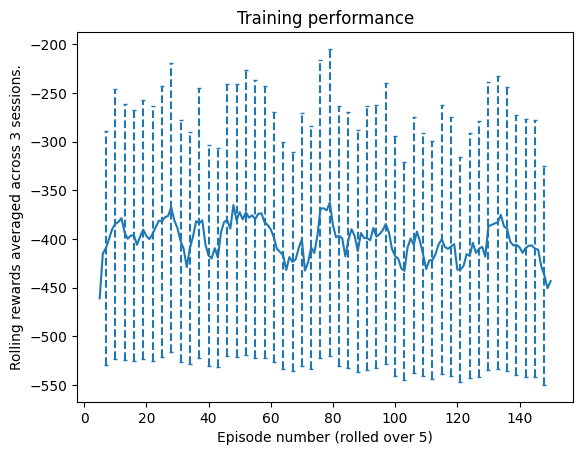

In [13]:
rolled_df_cnet = roll_training_data(rewards_df_cnet)
plot_training(rolled_df_cnet, 150)
plt.savefig('cnet_agg_training.png')
plt.show()

In [110]:
#We print the performance:
perf, mean_cnet, err_cnet = metrics(test_rewards_df_cnet)

             Mean       Err.
Session 0  -40.58  14.479263
Session 1 -597.00   0.000000
Session 2 -597.00   0.000000


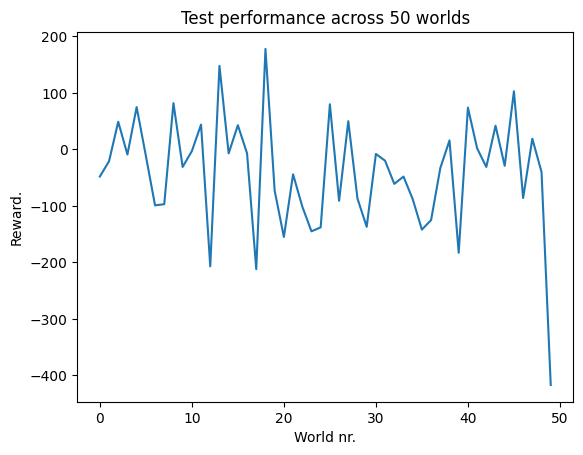

In [40]:
#We plot the best performer:
plot_test(test_rewards_df_cnet, perf)

### wnet, wnet+ and dwnet+

#### wnet

In [41]:
import old_wnet as ow
print(ow.wnet.nn_model)

WindowNet(
  (pw_conv): Tile3LayerConvolutionOLD(
    (pw_conv1): Linear(in_features=3, out_features=6, bias=True)
    (pw_conv2): Linear(in_features=6, out_features=1, bias=True)
  )
  (flatten): Flatten(start_dim=2, end_dim=-1)
  (dense_layers): Sequential(
    (0): Linear(in_features=12, out_features=12, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ELU(alpha=1.0)
    (3): Linear(in_features=12, out_features=4, bias=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=4, out_features=1, bias=False)
  )
)


In [42]:
test_initialize_model(ow.wnet)

Model internal state initialized...
Model feature computed...
Feature type: <class 'torch.Tensor'>
Model outcome on initial state: tensor([[-0.0134, -0.0134, -0.0134, -0.0134]], device='cuda:0')
Total number of parameters: 243
Model passed


In [43]:
rewards_df_wnet, test_rewards_df_wnet = run_training(ow.wnet_gen, train, test)

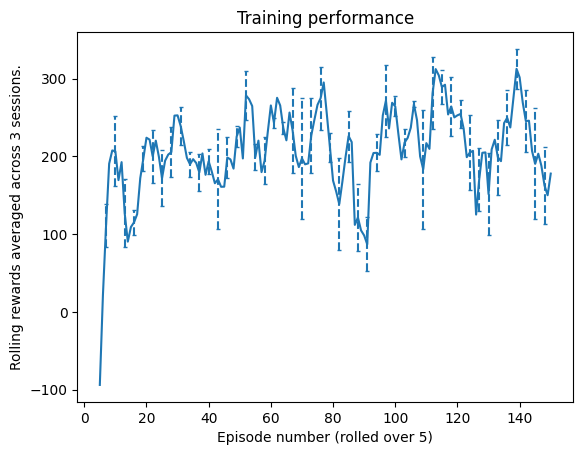

In [44]:
rolled_df_wnet = roll_training_data(rewards_df_wnet)
plot_training(rolled_df_wnet, 150)
plt.savefig('wnet_agg_training.png')
plt.show()

In [109]:
#We print the performance:
perf, mean_wnet, err_wnet = metrics(test_rewards_df_wnet)

            Mean       Err.
Session 0  -2.28  51.518881
Session 1  37.06  57.871296
Session 2 -63.64  56.562725


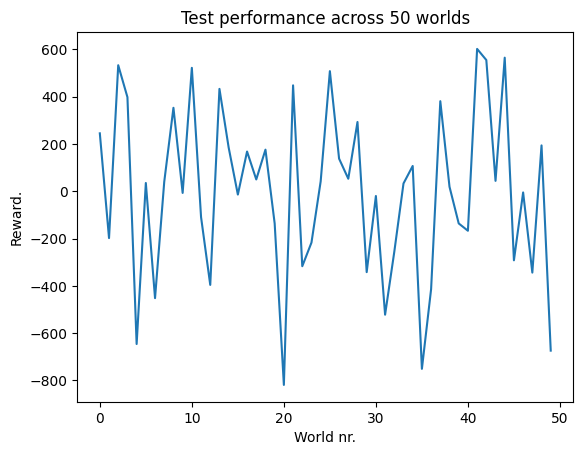

In [46]:
plot_test(test_rewards_df_wnet, perf)

#### wnet-plus

In [47]:
print(ow.wnet_plus.nn_model)

WindowNet(
  (pw_conv): Tile3LayerConvolutionOLD(
    (pw_conv1): Linear(in_features=3, out_features=6, bias=True)
    (pw_conv2): Linear(in_features=6, out_features=1, bias=True)
  )
  (flatten): Flatten(start_dim=2, end_dim=-1)
  (dense_layers): Sequential(
    (0): Linear(in_features=56, out_features=24, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ELU(alpha=1.0)
    (3): Linear(in_features=24, out_features=8, bias=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ELU(alpha=1.0)
    (6): Linear(in_features=8, out_features=1, bias=False)
  )
)


In [48]:
test_initialize_model(ow.wnet_plus)

Model internal state initialized...
Model feature computed...
Feature type: <class 'torch.Tensor'>
Model outcome on initial state: tensor([[0.1062, 0.1062, 0.1062, 0.1062]], device='cuda:0')
Total number of parameters: 1607
Model passed


In [50]:
rewards_df_wnet_plus, test_rewards_df_wnet_plus = run_training(ow.wnet_plus_gen, train, test)

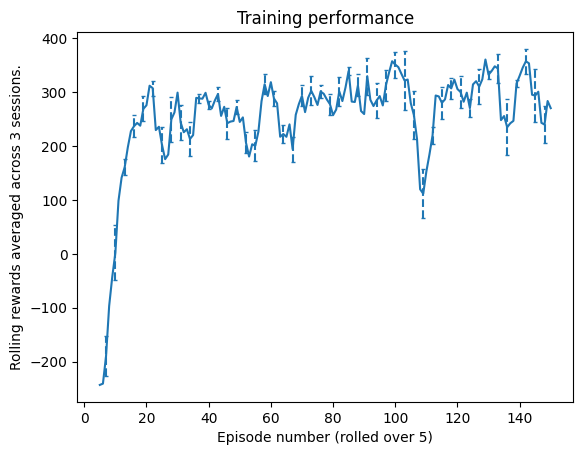

In [51]:
rolled_df_wnet_plus = roll_training_data(rewards_df_wnet_plus)
plot_training(rolled_df_wnet_plus, 150)
plt.savefig('wnet_plus_agg_training.png')
plt.show()

In [108]:
#We print the performance:
perf, mean_wnet_plus, err_wnet_plus = metrics(test_rewards_df_wnet_plus)

             Mean       Err.
Session 0  318.60  51.858977
Session 1  334.78  49.388880
Session 2  382.56  46.567311


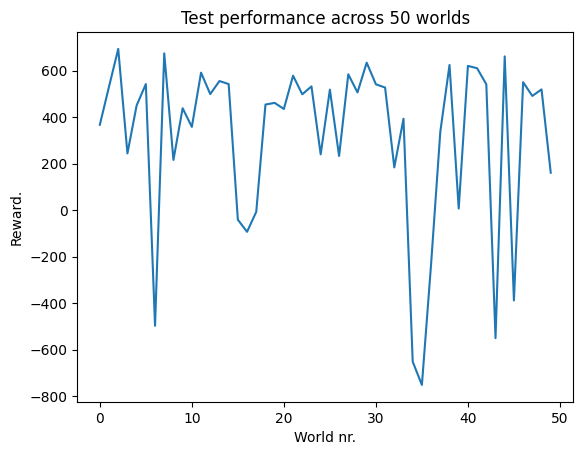

In [53]:
plot_test(test_rewards_df_wnet_plus, perf)

#### dwnet+
(There is no smaller version of this net that has been used - thus we just call it dwnet though it has the same set of features as wnet+)

In [54]:
print(ow.dwnet.nn_model)

DeepWindowNet(
  (entry_layer): Tile3LayerConvolutionOLD(
    (pw_conv1): Linear(in_features=3, out_features=6, bias=True)
    (pw_conv2): Linear(in_features=6, out_features=1, bias=True)
  )
  (flatten): Flatten(start_dim=2, end_dim=-1)
  (mid_layers): Sequential(
    (0): Linear(in_features=56, out_features=224, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=224, out_features=224, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=224, out_features=56, bias=True)
  )
  (later_layers): Sequential(
    (0): Linear(in_features=56, out_features=24, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=24, out_features=24, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=24, out_features=8, bias=True)
    (7): ELU(alpha=1.0)
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_fea

In [55]:
test_initialize_model(ow.dwnet)

Model internal state initialized...
Model feature computed...
Feature type: <class 'torch.Tensor'>
Model outcome on initial state: tensor([[-0.0108, -0.0108, -0.0108, -0.0108]], device='cuda:0')
Total number of parameters: 77975
Model passed


In [57]:
rewards_df_dwnet, test_rewards_df_dwnet = run_training(ow.dwnet_gen, train, test)

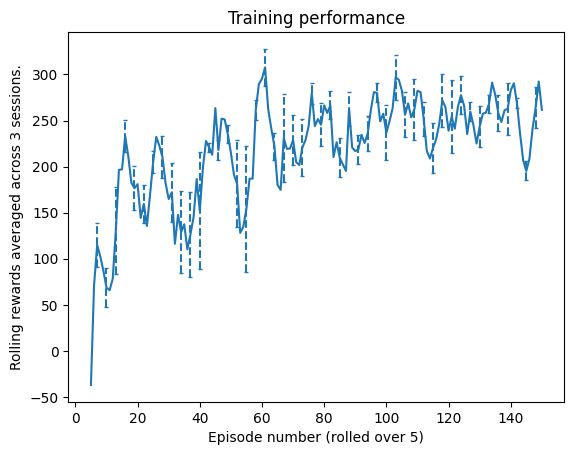

In [58]:
rolled_df_dwnet = roll_training_data(rewards_df_dwnet)
plot_training(rolled_df_dwnet, 150)
plt.savefig('dwnet_agg_training.png')
plt.show()

In [107]:
#We print the performance:
perf, mean_dwnet, err_dwnet = metrics(test_rewards_df_dwnet)

             Mean       Err.
Session 0  197.24  61.163799
Session 1 -259.16  59.161525
Session 2 -685.98  32.700265


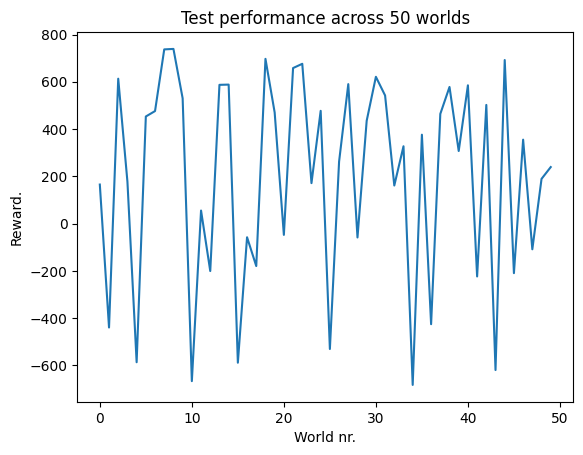

In [60]:
plot_test(test_rewards_df_dwnet, perf)

### rwnet

In [61]:
print(rw.rwnet.nn_model)

LocalNet(
  (pw_conv): Tile3LayerConvolution(
    (conv_layers): Sequential(
      (0): Conv2d(3, 6, kernel_size=(1, 1), stride=(1, 1), padding=valid)
      (1): ELU(alpha=1.0)
      (2): Conv2d(6, 1, kernel_size=(1, 1), stride=(1, 1), padding=valid)
      (3): ELU(alpha=1.0)
    )
  )
  (local_pathfinder): SimpleLocalPathfinderNet(
    (layers): Sequential(
      (0): Linear(in_features=105, out_features=45, bias=True)
      (1): ELU(alpha=1.0)
      (2): Linear(in_features=45, out_features=15, bias=True)
      (3): ELU(alpha=1.0)
      (4): Linear(in_features=15, out_features=1, bias=True)
    )
  )
  (flatten): Flatten(start_dim=3, end_dim=-1)
)


In [62]:
test_initialize_model(rw.rwnet)

Model internal state initialized...
Model feature computed...
Feature type: <class 'tuple'>
Model outcome on initial state: tensor([[-0.2403, -0.2403, -0.2403, -0.2403]], device='cuda:0')
Total number of parameters: 5507
Model passed


In [63]:
rewards_df_rwnet, test_rewards_df_rwnet = run_training(rw.rwnet_gen, train, test)

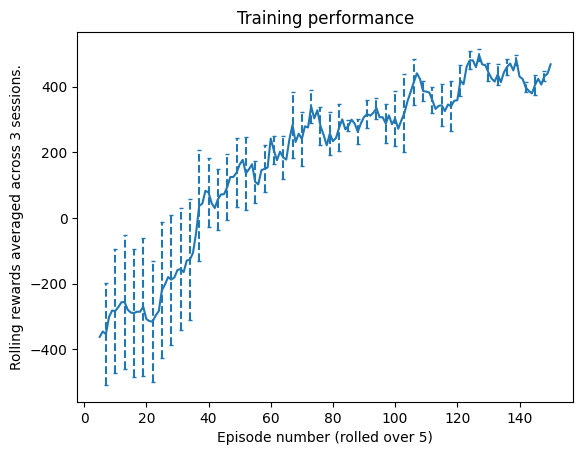

In [64]:
rolled_df_rwnet = roll_training_data(rewards_df_rwnet)
plot_training(rolled_df_rwnet, 150)
plt.savefig('rwnet_agg_training.png') #accidentally overwritten by convnet.... can't get it back now, two days later
plt.show()

In [102]:
#We print the performance:
perf, mean_rwnet, err_rwnet = metrics(test_rewards_df_rwnet)

             Mean       Err.
Session 0  383.96  30.187414
Session 1  431.70  26.877185
Session 2  477.42  18.353137


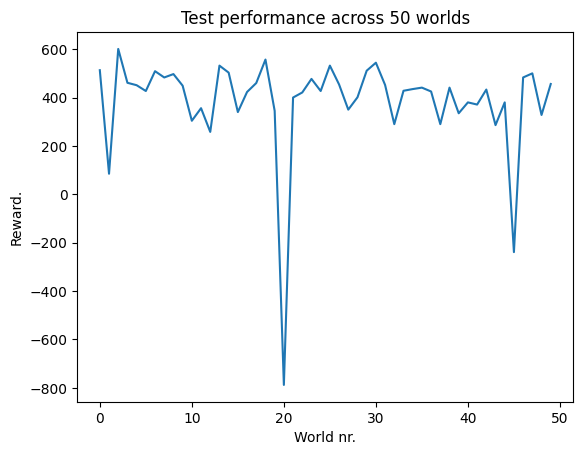

In [80]:
plot_test(test_rewards_df_rwnet, perf)

### Convnet

In [158]:
print(cv.convnet.nn_model)

LocalConvNet(
  (pw_conv): Tile3LayerConvolution(
    (conv_layers): Sequential(
      (0): Conv2d(3, 6, kernel_size=(1, 1), stride=(1, 1), padding=valid)
      (1): ELU(alpha=1.0)
      (2): Conv2d(6, 1, kernel_size=(1, 1), stride=(1, 1), padding=valid)
      (3): ELU(alpha=1.0)
    )
  )
  (local_pathfinder): SimpleConvNet(
    (layers): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ELU(alpha=1.0)
      (3): Conv2d(64, 8, kernel_size=(3, 3), stride=(1, 1))
      (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ELU(alpha=1.0)
      (6): Conv2d(8, 1, kernel_size=(11, 3), stride=(1, 1))
    )
  )
)


In [159]:
test_initialize_model(cv.convnet)

Model internal state initialized...
Model feature computed...
Feature type: <class 'tuple'>
Model outcome on initial state: tensor([[0.1411, 0.1411, 0.1411, 0.1411]], device='cuda:0')
Total number of parameters: 5696
Model passed


In [161]:
rewards_df_convnet, test_rewards_df_convnet = run_training(cv.convnet_gen, train, test)

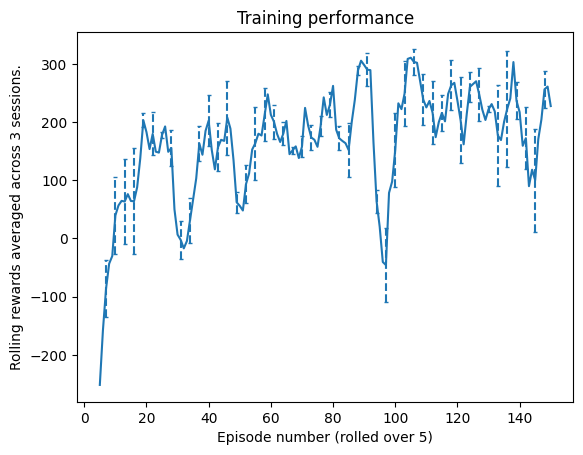

In [162]:
rolled_df_convnet = roll_training_data(rewards_df_convnet)
plot_training(rolled_df_convnet, 150)
plt.savefig('convnet_agg_training.png') 
plt.show()

In [163]:
#We print the performance:
perf, mean_convnet, err_convnet = metrics(test_rewards_df_convnet)

             Mean       Err.
Session 0  283.42  28.214139
Session 1  289.58  41.412343
Session 2  250.36  17.240052


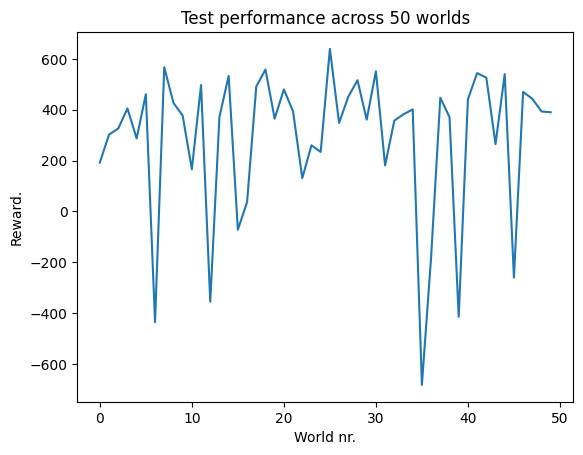

In [164]:
plot_test(test_rewards_df_convnet, perf)

## Comparison of above model training
Combining the above models training plots

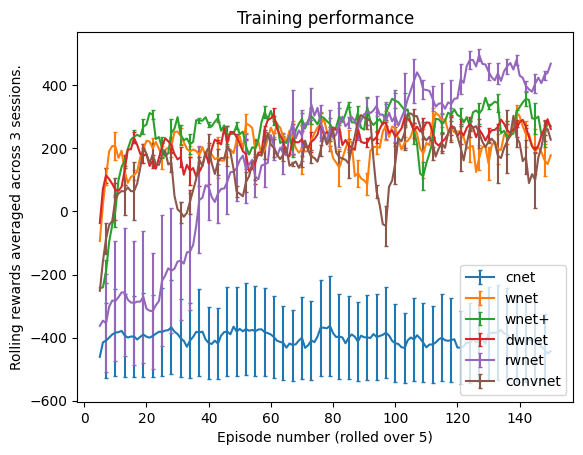

In [169]:
rolled_dfs = [rolled_df_cnet, rolled_df_wnet, rolled_df_wnet_plus, rolled_df_dwnet, rolled_df_rwnet, rolled_df_convnet]
names= ['cnet', 'wnet', 'wnet+', 'dwnet', 'rwnet', 'convnet']
fp = multiplot_training(rolled_dfs, names, 150, sessions = 3, roll_nr = 5)
plt.savefig('all_model_training.png')
plt.show()

#### Test performance: Best agents
We create a dataframe for the best performing agents within each architecture:

In [171]:
perf = pd.DataFrame()
perf['Means'] = [mean_cnet, mean_wnet, mean_wnet_plus, mean_dwnet, mean_rwnet, mean_convnet]
perf['Std. Err'] =[err_cnet, err_wnet, err_wnet_plus, err_dwnet, err_rwnet, err_convnet]
perf.index = ['cnet', 'wnet', 'wnet+', 'dwnet', 'rwnet', 'convnet']
perf.to_csv("perf.csv")
perf

,Means,Std. Err
cnet,-40.58,14.479263
wnet,37.06,57.871296
wnet+,382.56,46.567311
dwnet,197.24,61.163799
rwnet,477.42,18.353137
convnet,289.58,41.412343
